In [ ]:
# colab 사용할 경우
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 현재 디렉터리 위치 확인
!pwd

/content


# Image Preprocessing

## Pillow (PIL) Library

이미지를 다루는 파이썬 라이브러리로 OpenCV도 존재하나 Pillow의 장점인
* RGB 순서 그대로 이미지 읽어옴
* torchvision에서의 지원이 잘 되어있음

의 장점으로 여기서는 Pillow 라이브러리 사용

In [ ]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
# 본인의 구글 드라이브(현재 디렉터리)에 whale.jpg 파일이 올라가 있어야 함!
# colab의 경우 content 폴더 바로 아래에 들어가면 됨

whale_img_path = 'whale.jpg'
# pillow 라이브러리의 Image.open 함수로 해당 위치의 이미지를 읽어옴
whale_img = Image.open(whale_img_path)

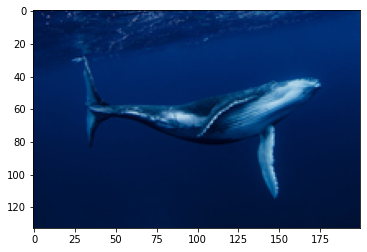

In [ ]:
# 받아온 PIL 형태의 이미지를 numpy 형태로 변환
whale_img_np = np.array(whale_img)
imshow(whale_img_np)

In [ ]:
# shape 확인 -> height = 133, width = 200, channel = 3 (RGB) 임을 확인할수 있음
whale_img_np.shape

(133, 200, 3)

In [ ]:
# 가장 첫번째 pixel (RGB) 값 확인
# data type = uint8 (only 0~255 사이 정수)
whale_img_np[0,0,:]

array([ 2, 24, 74], dtype=uint8)

## Normalize

참고) https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/

### ToTensor()

* 이미지를 pytorch를 통해 학습을 시키기 위해서는? 우선 torch 형태로 변환해야됨
* 0 ~ 255 사이 정수값을 0 ~ 1 사이 실수값으로 바꿔주는 과정도 필요

이를 같이 해주는 것이 
`
torchvision.transforms.ToTensor()
`



In [ ]:
import torchvision.transforms as transforms

In [ ]:
# custom transform function 설정 - Compose 안에 내가 원하는 변환 과정을 순서대로 써주면됨
# 여기서는 일단 ToTensor만 사용
transform_ts = transforms.Compose([
    transforms.ToTensor()
])

PIL 이미지는 (H, W, C) 형태이지만 이를 변환한 Tensor 이미지는 (C, H, W)임에 유의하자

In [ ]:
# PIL 이미지를 Tensor로 변환
whale_img_ts = transform_ts(whale_img)
whale_img_ts.shape

torch.Size([3, 133, 200])

In [ ]:
# 가장 첫번째 pixel (RGB) 값 확인
whale_img_ts[:,0,0]

tensor([0.0078, 0.0941, 0.2902])

0 ~ 255를 0 ~ 1 범위로 변환한 것을 확인할 수 있음
(원래 R값인 2가 2/255=0.0078이 되었음)

### Calculate mean and std

Channel-wise! (각 채널별로 mean, std 값을 구해야함)

Q. 지금은 이미지 하나 대해서 normalize하고 있지만 이미지 데이터셋 대해서 normalize하려면?

In [ ]:
mean, std = whale_img_ts.mean([1,2]), whale_img_ts.std([1,2])

In [ ]:
mean

tensor([0.0204, 0.1463, 0.3528])

In [ ]:
std

tensor([0.0761, 0.1061, 0.1179])

### Normalize()

In [ ]:
# custom transform function 설정 - ToTensor에 이어서 Normalize까지
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [ ]:
whale_img_normalized = transform_norm(whale_img)

In [ ]:
whale_img_normalized[:,0,0]

tensor([-0.1648, -0.4914, -0.5309])

Normalize되어 (mean=0, std=1) 음수값으로 바뀐 것을 확인할 수 있음

In [ ]:
mean_norm, std_norm = whale_img_normalized.mean([1,2]), whale_img_normalized.std([1,2])

In [ ]:
mean_norm # 거의 0

tensor([-2.3232e-08, -1.7926e-08,  1.2362e-07])

In [ ]:
std_norm # 1

tensor([1., 1., 1.])

In [ ]:
# 편의상 이미지 보여주기 위해 numpy 변환
whale_normalized_np = np.array(whale_img_normalized)
whale_normalized_np.shape

(3, 133, 200)

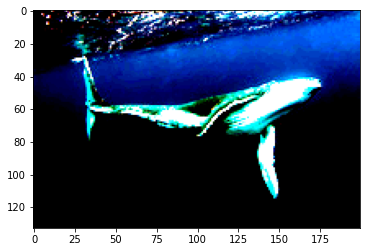

In [ ]:
# 편의상 이미지 보여주기 위해 차원 순서 바꾸자
whale_augmented_tr = whale_normalized_np.transpose(1,2,0)
imshow(whale_augmented_tr)

## Data Augmentation

* 굉장히 다양한 Augmentation 종류
* 너무 다양하게 쓸 필요는 없음 - 필요한 만큼만 적당히 쓰자

참고) https://pytorch.org/vision/stable/transforms.html
<br>
참고) https://jungnamgyu.tistory.com/32

In [ ]:
# 보통 적용할 augmentation을 ToTensor, Normalize 전에 사용
transform = transforms.Compose([
    transforms.Resize(300),                 # 300으로 resize
    transforms.RandomCrop(224),             # 랜덤으로 224만큼 crop
    transforms.RandomHorizontalFlip(p=0.5), # 0.5 확률로 horizontal flip
    transforms.RandomRotation(20),          # 랜덤으로 20도 만큼 rotate
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [ ]:
whale_augmented = transform(whale_img)

In [ ]:
# 편의상 이미지 보여주기 위해 numpy 변환
# size 바뀐 것 확인가능
whale_augmented_np = np.array(whale_augmented)
whale_augmented_np.shape

(3, 224, 224)

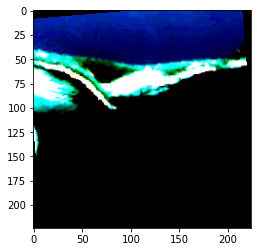

In [ ]:
# 편의상 이미지 보여주기 위해 차원 순서 바꾸자
whale_augmented_tr = whale_augmented_np.transpose(1,2,0)
imshow(whale_augmented_tr)

* 우리가 원하는 Augmentation 적용된 것 확인
* 충분히 위에서 normalized된 이미지와 비슷한 형태 - 고민할 것은 올바른 Augmentation 옵션의 활용 (모델이 이걸 whale로 분류하도록 할만큼 whale 같은 사진인가? 원래 특징 잃어버릴 정도로 너무 심하게 변환했을때? ex. 음식 뒤집으면)
* 너무 많이 적용시키면 underfitting 발생할수도
* 위 그림처럼 보통 모델에 들어가는 이미지의 차원 정사각형 형태로 맞춰줌

# Build CNN Model

## Using Popular Dataset (like MNIST, CIFAR10)

CIFAR-10 - 10개 label, 32*32, color

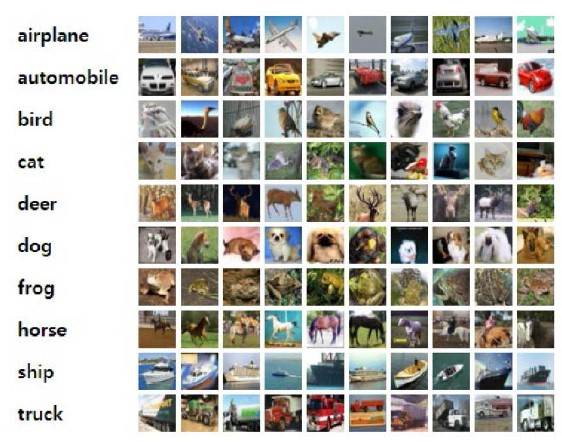

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
# transform function for CIFAR10 train dataset
# Augmentation 적용
# normalize는 ImageNet의 mean, std로
transform_cifar_train = transforms.Compose([
    transforms.ColorJitter(brightness=0.5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

test dataset에 굳이 Augmentation을 적용할 필요가 있을까?
* 어차피 확인하기 위한 용도이고, 굳이 train처럼 data개수 늘려주기 위해 변환할 필요가 없음

단, ToTensor와 Normalize는 train에서와 똑같이 유지해야됨 (pixel 값을 똑같은 식으로 바꿔줘야 모델에 넣었을 때도 같은 효과 적용)

In [ ]:
# transform function for CIFAR10 test dataset
# Augmentation 적용 X -> why?
transform_cifar_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

Recall

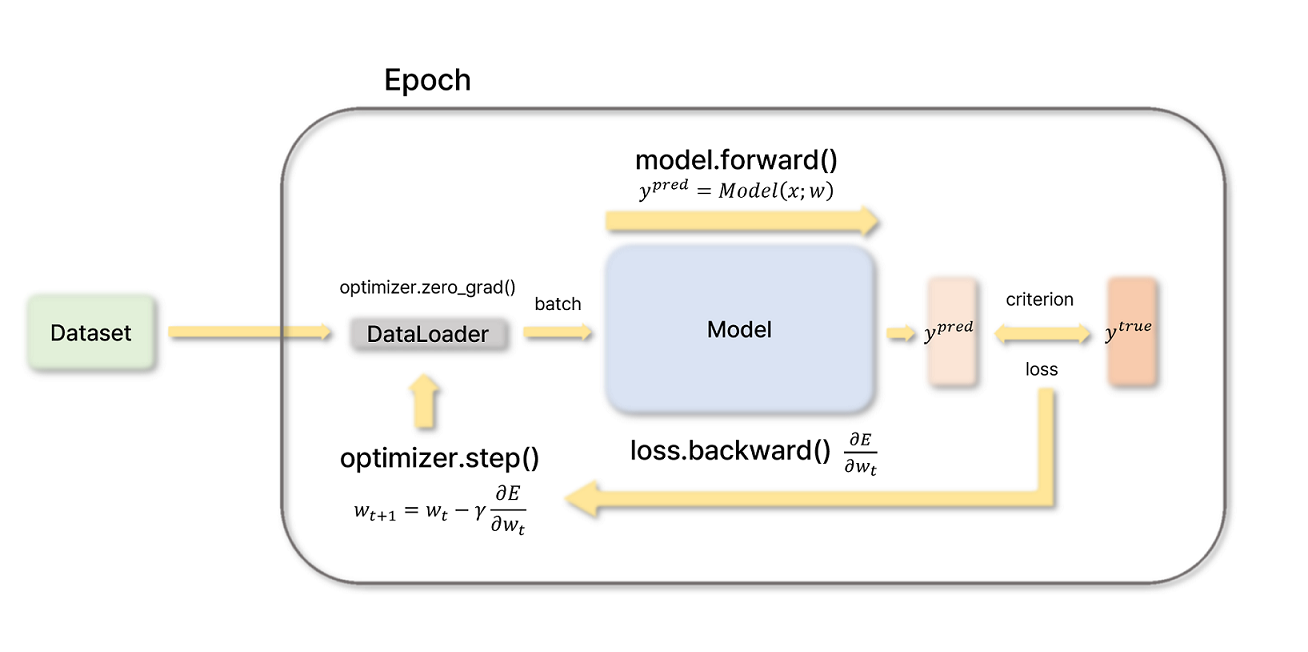

### Dataset 불러오기
`torchvision.datasets` 모듈을 통해 torchvision에서 제공하는 MNIST, CIFAR-10 등 범용적인 데이터셋을 쉽게 다운받을 수 있다.

(우리가 직접 Dataset 클래스를 정의할 필요가 없음)

In [ ]:
train_dataset_cifar = torchvision.datasets.CIFAR10(
    root = './data',                      # 불러들인 데이터가 저장되는 디렉터리 위치
    train = True,                         # train data인지, 아닌지
    transform = transform_cifar_train,    # 적용할 transform function
    download = True
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


Dataset 정의할 때 가지고 있는 transform 함수를 인자로 넣는 것에 유의

In [ ]:
test_dataset_cifar = torchvision.datasets.CIFAR10(
    root = './data',
    train = False,
    transform = transform_cifar_test, 
    download = True
)

Files already downloaded and verified


Dataset intuition : 가지고 있는 data를 dataset의 형태로 바꾸자!

pytorch가 이러한 dataset을 접근하기 위해서는
* 총 data 개수가 얼마인지 알아야됨 -> __ len __ 함수 정의 필요
* i번째 data가 뭔지 알아야됨 -> __ getitem __ 함수 정의 필요

따라서 이 둘은 Dataset 클래스 만들때 (init과 함께 필수적으로 들어가야할 함수인것!

### Dataset 확인 (잘 정의되었나)

In [ ]:
train_dataset_cifar

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ColorJitter(brightness=[0.5, 1.5], contrast=None, saturation=None, hue=None)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [ ]:
# train dataset의 data 개수 확인
len(train_dataset_cifar)

50000

In [ ]:
# Dataset의 data 하나는 tuple (img tensor, label)로 구성
# 우리가 Dataset 직접 설정할때 __getitem__ 함수에서 data값, lable 리턴하는 것과 같은 원리
train_dataset_cifar[0]

(tensor([[[-2.1179, -1.7240, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -1.5014, -1.7240,  ...,  1.7865,  1.7865,  1.6495],
          [-2.1179, -1.3130, -1.1760,  ...,  1.1700,  0.9303,  0.8276],
          ...,
          [ 2.1633,  2.2489,  2.2489,  ..., -0.7308, -1.3130, -2.1179],
          [ 2.0434,  2.2489,  2.2489,  ..., -0.7308, -0.8164, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ...,  0.2796, -0.0629, -2.1179]],
 
         [[-2.0357, -1.5455, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -1.4405, -1.8606,  ...,  1.2556,  1.3081,  1.1331],
          [-2.0357, -1.4055, -1.5455,  ...,  0.3978,  0.1877,  0.0651],
          ...,
          [ 1.0805,  1.6057,  1.8333,  ..., -1.3004, -1.5630, -2.0357],
          [ 1.2206,  1.5532,  1.7283,  ..., -1.2654, -1.1779, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -0.4776, -0.7052, -2.0357]],
 
         [[-1.8044, -1.3164, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.2816,

In [ ]:
# train dataset의 첫번째 img의 size 확인
# channel = 3, height = width = 32
train_dataset_cifar[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
# train dataset의 첫번째 img의 class 확인
train_dataset_cifar[0][1]

6

### DataLoader 정의
DataLoader intuition : 가지고 있는 Dataset을 batch 단위 (뭉탱이)로 쪼개어 batch0, batch1, ... 으로 쉽게 연속적으로 접근할 수 있도록 하자

In [ ]:
trainloader_cifar = torch.utils.data.DataLoader(
    train_dataset_cifar,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=True,         # train dataloader는 epoch마다 데이터 다시 섞어서 batch 만들고 학습! - 학습 효율 up
    num_workers=2
)

In [ ]:
testloader_cifar = torch.utils.data.DataLoader(
    test_dataset_cifar,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=False,        # test dataloader는 데이터 매번 섞을 이유가 없음 - 어차피 확인 용도
    num_workers=2
)

### DataLoader 확인 (잘 정의되었나)

Recall) 전체 DataLoader 하나를 모두 학습 = iteration번 만큼 모든 batch를 학습

-> 따라서 DataLoader의 길이 = iteration = (data 개수) /(batch size)

In [ ]:
# 50000/32 = 1563
len(trainloader_cifar)

1563

In [ ]:
# 10000/32 = 313
len(testloader_cifar)

313

In [ ]:
# dataloader의 iteration 하나만 가져와서 확인해보자
tmploader_cifar = torch.utils.data.DataLoader(test_dataset_cifar, batch_size = 4, shuffle=False)
dataiter = iter(tmploader_cifar)
images, labels = dataiter.next()

In [ ]:
images.shape # 4개 img

torch.Size([4, 3, 32, 32])

In [ ]:
labels.shape # 4개 label

torch.Size([4])

In [ ]:
# CIFAR-10의 10개 class
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# test dataloader의 첫 batch 확인
def imshow_loader(img):
    img = img * 0.225 + 0.456 # 정확한 값은 아니지만 대강 normalize 반대로
    img_np = np.array(img)
    imshow(np.transpose(img_np, (1,2,0)))
    plt.show()

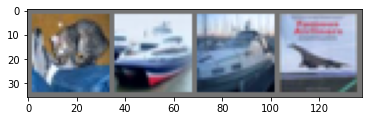

cat   ship  ship  plane


In [ ]:
imshow_loader(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

### Model 클래스 정의 & 확인
차원에 유의하자!

In [ ]:
import torch.nn as nn

In [ ]:
#### 모델 정의 시 유념해야할 건 각 층의 결과물의 차원!
#### 모델이 복잡해지면 복잡해질수록 이는 더욱 중요해지므로 레이어별로 도출되는 데이터의 크기를 써넣는 것을 추천 (안맞으면 에러남)
# (해당 모델은 임의로 만든 모델로 성능을 보장하지 X)

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5),             # [batch_size,3,32,32] -> [batch_size,16,28,28] -> same with? - using 16 filters
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5),            # [batch_size,16,28,28] -> [batch_size,32,24,24]
            nn.ReLU(),
            nn.Dropout(0.2), # 0.2 확률로 Dropout
            nn.MaxPool2d(kernel_size=2, stride=2),                                # [batch_size,32,24,24] -> [batch_size,32,12,12]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=2), # [batch_size,32,12,12] -> [batch_size,32,12,12] -> padding*2 주의!
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),            # [batch_size,32,12,12] -> [batch_size,32,10,10]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2)                                 # [batch_size,32,10,10] -> [batch_size,32,5,5]
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(32*5*5,100),                                                # [batch_size,32*5*5] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,16,5,5] -> [batch_size,16*5*5]
        out = self.fc_layer(out)
        return out

참고) Conv2d https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

In [ ]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 모델 구조 파악할 수 있는 torchsummary의 summary 함수
# 전체적인 구조, param 개수, 용량 등 확인할 수 있음
# 이게 잘나와야 CNN 모델 차원 알맞게 정의한것 - 차원 맞지 않다면 여기서 에러뜸

from torchsummary import summary
test_model = MyModel() # 모델 객체 선언
summary(test_model, (3,32,32), batch_size=32) # Recall) Tensor는 C, H, W 순서로 이미지 가짐

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 16, 28, 28]           1,216
              ReLU-2           [32, 16, 28, 28]               0
            Conv2d-3           [32, 32, 24, 24]          12,832
              ReLU-4           [32, 32, 24, 24]               0
           Dropout-5           [32, 32, 24, 24]               0
         MaxPool2d-6           [32, 32, 12, 12]               0
            Conv2d-7           [32, 32, 12, 12]          25,632
              ReLU-8           [32, 32, 12, 12]               0
            Conv2d-9           [32, 32, 10, 10]           9,248
             ReLU-10           [32, 32, 10, 10]               0
          Dropout-11           [32, 32, 10, 10]               0
        MaxPool2d-12             [32, 32, 5, 5]               0
           Linear-13                  [32, 100]          80,100
             ReLU-14                  [

대부분의 paramater는 마지막 FC layer에서 존재함을 확인할 수 있음

### Device 설정 (GPU 활용) & Model 객체 선언

In [ ]:
# 아래 코드가 보통 device 할당하는 방식
# colab일 경우, 무거운 모델을 돌린다면 런타임 -> 런타임 유형 변경 -> GPU 로 설정하고 돌리는걸 강추
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
# to(device) : 모델을 device 위에서 돌릴거임
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): Dropout(p=0.2, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): Dropout(p=0.2, inplace=False)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=800, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

### Loss Func, Optimizer 정의

In [ ]:
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001) # 보통 Adam의 learning rate로 0.001 사용
                                                                                  # weight_decay = L2 Regularization의 lambda값 (가중치 제한 정도)

### Train & Test 함수 정의

train 코드에 들어가기 전에 코드 내에 차원부터 뜯어보자 (헷갈리면 이런 과정 거쳐보면 좋음)

In [ ]:
with torch.no_grad():
    for i, (inputs, targets) in enumerate(trainloader_cifar):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape)  # batch_size개의 이미지
        print(targets.shape) # batch_size개의 클래스

        outputs = mymodel(inputs)
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩)
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)

        loss = criterion(outputs, targets)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스
        print(targets) # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 32, 32])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.310009241104126
tensor([9, 2, 2, 9, 5, 9, 2, 9, 9, 5, 9, 2, 9, 9, 9, 9, 5, 9, 9, 9, 9, 5, 9, 9,
        2, 2, 9, 2, 9, 5, 9, 9])
tensor([9, 0, 5, 6, 2, 6, 0, 8, 7, 7, 9, 1, 8, 7, 1, 8, 1, 2, 5, 1, 6, 8, 5, 8,
        9, 3, 3, 0, 9, 6, 0, 9])
4


In [ ]:
# 추후 시각화를 위해 매 epoch마다 loss, accuracy 값을 저장할 리스트
# 이거 빼먹고 train 돌리면...
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

train 함수

In [ ]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader_cifar):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 300 == 299:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 300 batches: {running_loss / 300}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

test 함수

In [ ]:
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader_cifar):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

### Training
모델 저장에 관해서는 다음 시간에 더 자세히!

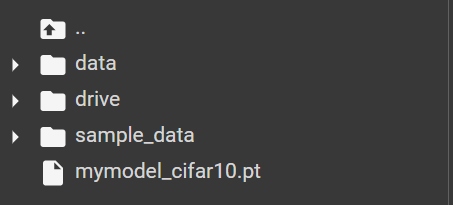

In [ ]:
num_epoch = 5

In [ ]:
# 연습 삼아 5 epoch만 진행
# 실제로 훈련할때는 올바른 epoch 설정 필요

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장! - parameter값 저장
torch.save(mymodel.state_dict(), './mymodel_cifar10.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Current batch: 300
Average train loss of recent 300 batches: 2.1080751260121664

Current batch: 600
Average train loss of recent 300 batches: 1.8659760653972626

Current batch: 900
Average train loss of recent 300 batches: 1.7363732047875722

Current batch: 1200
Average train loss of recent 300 batches: 1.6741509103775025

Current batch: 1500
Average train loss of recent 300 batches: 1.6389114530881246

Total train accuarcy: 34.704
Total train loss: 1.7965834598394823

[ Test epoch: 1 ]

Test accuarcy: 44.01
Test average loss: 1.6035301845294598

[ Train epoch: 2 ]

Current batch: 300
Average train loss of recent 300 batches: 1.5830289169152578

Current batch: 600
Average train loss of recent 300 batches: 1.57374600370725

Current batch: 900
Average train loss of recent 300 batches: 1.5434601922829947

Current batch: 1200
Average train loss of recent 300 batches: 1.5290213123957317

Current batch: 1500
Average train loss of recent 300 batches: 1.4995042759180068

T

Tip) Train은 굉장히 오래 걸리는 과정이므로
* 웬만하면 colab의 GPU를 사용하자
* colab은 계속 클릭 안하고 있으면 로봇 확인 뜨면서 멈춤 -> 계속 어딘가 클릭하도록 매크로 설정 (참고: https://inistory.tistory.com/113)

In [ ]:
# model 불러오기 - 다른 파일에서 이렇게 학습한 모델 사용하고 싶다면
pretrained = MyModel()
pretrained.load_state_dict(torch.load('./mymodel_cifar10.pt'))

### Loss, Accuracy 추이 확인

In [ ]:
seq_train_loss

[1.7965834598394823,
 1.543452503470679,
 1.4523758432534133,
 1.3908660363022212,
 1.3391587600750718]

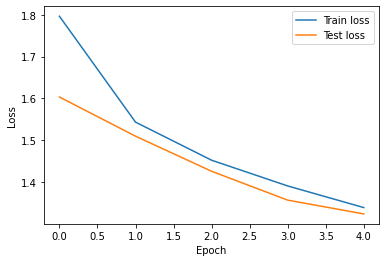

In [ ]:
plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
seq_train_acc

[34.704, 44.288, 47.72, 50.246, 52.06]

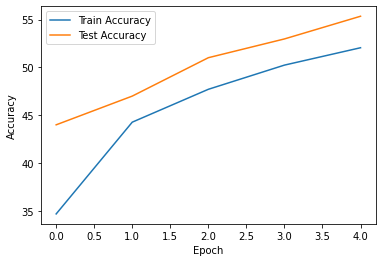

In [ ]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### 모델 성능에 대한 고민!!
* Augmentation 종류는 적절히 잡은 것인가
  * transforms 조절
* Loss와 Accuracy가 어느 정도 수렴할 때까지 학습 진행이 되었는가?
  * epoch을 좀 늘리자 (인내심을 가지고 30 ~ 50 epoch까지도 고려)
* 그럼에도 Loss가 너무 느리게 줄어드는가?
  * 모델 설명력 높이기 위해 모델 구조 변경
  * Learning rate 조절 (lr은 Adam에서 보통 0.001을 사용 / 너무 커도 너무 작아도 안됨 -> learning rate scheduling도 가능)
    * 참고) https://inhovation97.tistory.com/32)
  * Batch size 조절 (보통 batch size는 16, 32로 고정 / 너무 크다면 한번에 너무 많은 데이터 대한 loss 계산하여 weight update 느림)
* Overfitting이 발생했는가? (= train에만 너무 과적합)
  * epoch을 좀 줄이자
  * 모델 구조 변경 (parameter 개수 줄이기, dropout, batch normalization)
  * optimizer에 weight_decay

## Using My Dataset
* 우리가 주로 다루게 될 앞으로의 상황은 가지고 있는 이미지를 직접 사용하는 것

### 이미지 확인

In [ ]:
# python에서 파일 관리해주는 라이브러리
import os
import glob
import shutil

In [ ]:
# 압축 풀기
# Tip) colab 기준, 내 컴퓨터에서 압축을 풀어 폴더를 업로드하는 것보다, 아래와 같은 명령어로 colab 내에서 압축을 풀어 진행하는 것이 데이터 접근 속도에 있어서 훨씬 빠름
!unzip -qq "tire.zip"

In [ ]:
!ls

archive.zip  drive  sample_data  tire-dataset


In [ ]:
# glob.glob로 파일 개수 확인
flat = sorted(glob.glob('./tire-dataset/flat.class/*.jpg'))
full = sorted(glob.glob('./tire-dataset/full.class/*.jpg'))
no_tire = sorted(glob.glob('./tire-dataset/no-tire.class/*.jpg'))

print(len(flat))
print(len(full))
print(len(no_tire))

300
300
300


In [ ]:
flat[:5]

['./tire-dataset/flat.class/00000.jpg',
 './tire-dataset/flat.class/00001.jpg',
 './tire-dataset/flat.class/00002.jpg',
 './tire-dataset/flat.class/00003.jpg',
 './tire-dataset/flat.class/00004.jpg']

편의를 위해 폴더 구조를

* root/train/dog/xxx.jpg
* root/train/cat/xxx.jpg
* root/test/dog/xxx.jpg
* root/test/dog/xxx.jpg

로 두어 이미지를 배치하는 것이 좋다.
따라서 현재 이미지를 train / test 폴더로 적절히 split해보자

### 이미지 train/test split
20%의 이미지를 test로 활용하자

In [ ]:
# test에 넣을 이미지 개수 계산
flat_test_count = round(len(flat)*0.2)
full_test_count = round(len(full)*0.2)
no_tire_test_count = round(len(no_tire)*0.2)

print(flat_test_count)
print(full_test_count)
print(no_tire_test_count)

60
60
60


In [ ]:
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [ ]:
# 폴더 경로 선언 & 만들기
flat_train_path='./train/flat'
flat_test_path='./test/flat'
os.makedirs(flat_train_path, exist_ok=True)
os.makedirs(flat_test_path, exist_ok=True)

full_train_path='./train/full'
full_test_path='./test/full'
os.makedirs(full_train_path, exist_ok=True)
os.makedirs(full_test_path, exist_ok=True)

no_tire_train_path='./train/no_tire'
no_tire_test_path='./test/no_tire'
os.makedirs(no_tire_train_path, exist_ok=True)
os.makedirs(no_tire_test_path, exist_ok=True)

In [ ]:
split(flat, flat_test_count, flat_train_path, flat_test_path)
split(full, full_test_count, full_train_path, full_test_path)
split(no_tire, no_tire_test_count, no_tire_train_path, no_tire_test_path)

train 폴더 이미지 개수 : 240
test 폴더 이미지 개수 : 60
train 폴더 이미지 개수 : 240
test 폴더 이미지 개수 : 60
train 폴더 이미지 개수 : 240
test 폴더 이미지 개수 : 60


결과적으로

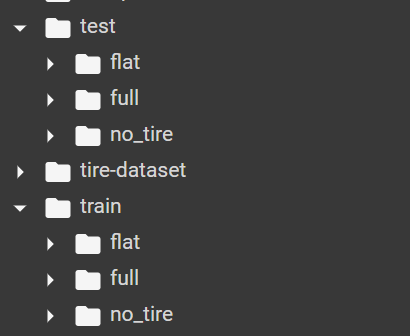

In [ ]:
flat_test = sorted(glob.glob('./test/flat/*.jpg'))
flat_test[:5]

['./test/flat/00000.jpg',
 './test/flat/00004.jpg',
 './test/flat/00006.jpg',
 './test/flat/00009.jpg',
 './test/flat/00015.jpg']

### 이미지 넘버링 다시 (생략 가능)
* 각 폴더 안에서 편의를 위해 0번부터 넘버링되도록 파일 이름을 바꾸자
* 추후에 나올 `ImageFolder`를 활용한다면 굳이 거쳐야 하는 과정은 아님

In [ ]:
i = 4
print(f'{i:0>5}') # 이 형식으로 바꿀예정

00004


In [ ]:
def rename(img_dir):
  # img_dir : rename을 할 대상 폴더

  file_list = sorted(glob.glob(img_dir+'/*.jpg')) # 들어있는 파일이름 리스트
  
  for i in range(len(file_list)):
    os.rename(file_list[i], os.path.join(img_dir, f'{i:0>5}.jpg')) # 순서대로 0000i.jpg로 이름 변경

In [ ]:
rename('./test/flat')
rename('./test/full')
rename('./test/no_tire')

In [ ]:
rename('./train/flat')
rename('./train/full')
rename('./train/no_tire')

In [ ]:
# 잘 rename 되었는지 확인
flat_train = sorted(glob.glob('./train/flat/*.jpg'))
flat_test = sorted(glob.glob('./test/flat/*.jpg'))

print(flat_train[-5:])
print(flat_test[-5:])

['./train/flat/00235.jpg', './train/flat/00236.jpg', './train/flat/00237.jpg', './train/flat/00238.jpg', './train/flat/00239.jpg']
['./test/flat/00055.jpg', './test/flat/00056.jpg', './test/flat/00057.jpg', './test/flat/00058.jpg', './test/flat/00059.jpg']


### Dataset 객체 선언 & 확인

#### ImageFolder
* 위와 같이 폴더 배치를 했다면 `torchvision.datasets.ImageFolder`를 활용하여 바로 Dataset 선언할 수 있음

In [ ]:
train_data = torchvision.datasets.ImageFolder(
    root = './train', # 바로 train 폴더 지정
    transform = transform_cifar_train # transform은 그냥 편의상 cifar에서 썼던거 그대로
)
test_data = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_cifar_test
)

Dataset 특성 확인

In [ ]:
# train dataset 총 개수 = 240*3 = 720
len(train_data)

720

In [ ]:
train_data[0]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

In [ ]:
# train dataset의 첫번째 img의 size 확인
train_data[0][0].shape

torch.Size([3, 240, 240])

In [ ]:
# train dataset의 첫번째 img의 label 확인
train_data[0][1]

0

In [ ]:
# train dataset의 마지막 img의 label 확인
train_data[719][1]

2

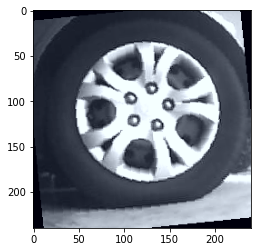

In [ ]:
imshow_loader(train_data[0][0])

#### Custom Dataset
* 직접 Datset 클래스 만들기 - 추후 더 복잡한 task에 유용
* 우리가 원하는대로 함수 내용 정하면됨
* 참고) https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [ ]:
from torch.utils.data import Dataset

In [ ]:
### example
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame) # 총 데이터 개수 return

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample # (data, label) 쌍 return

### DataLoader 정의부터 계속 진행
위와 동일한 방법으로 (생략)